In [130]:
print "started"
from numpy import genfromtxt
my_data = genfromtxt('train.csv', delimiter=',',skip_header=1)
# my_data = genfromtxt?
print my_data.shape

started
(42000, 785)


In [176]:
print "started"
from numpy import genfromtxt
test_data = genfromtxt('test.csv', delimiter=',',skip_header=1)
# my_data = genfromtxt?
print test_data.shape

started
(28000, 784)


In [177]:
test = test_data
test.shape

(28000, 784)

In [132]:
data = my_data
data.shape

(42000, 785)

In [133]:
Y = data[:,0]

In [134]:
Y = data[:,0]
X = data[:,range(1,785)]

In [ ]:
xt = 

In [33]:
X.shape

(42000, 784)

In [34]:
# import pickle

# obj0, obj1, obj2 are created here...

# Saving the objects:
# with open('objs.pickle', 'w') as f:
#     pickle.dump([X, Y], f)

# Getting back the objects:
# with open('objs.pickle') as f:
#     X, Y = pickle.load(f)

In [37]:
import numpy
numpy.sqrt(784)

28.0

In [102]:
xs = X[range(10000),:]
ys = Y[range(10000)]
print xs.shape, ys.shape

(10000, 784) (10000,)


Populating the interactive namespace from numpy and matplotlib


<matplotlib.colorbar.Colorbar instance at 0x7f404f690200>

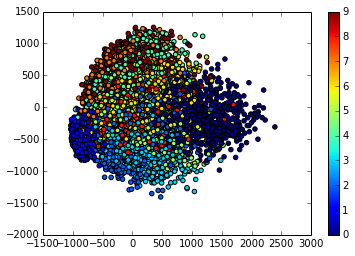

In [88]:
%pylab inline
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
from sklearn.decomposition import RandomizedPCA
pca = RandomizedPCA(n_components=2)
proj = pca.fit_transform(xs)
plt.scatter(proj[:, 0], proj[:, 1], c=ys)
plt.colorbar()

Populating the interactive namespace from numpy and matplotlib


<matplotlib.colorbar.Colorbar instance at 0x7f404e95cb90>

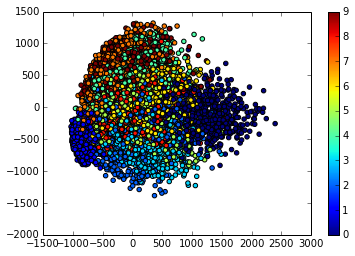

In [90]:
%pylab inline
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
from sklearn.decomposition import RandomizedPCA
pca = RandomizedPCA(n_components=2)
proj = pca.fit_transform(xs)
plt.scatter(proj[:, 0], proj[:, 1], c=ys)
plt.colorbar()

In [172]:
img = X.reshape(42000,28,28)
img.shape

(42000, 28, 28)

In [173]:
img2 = img[:,range(4,24),:]
img2 = img2[:,:,range(4,24)]
img2.shape

(42000, 20, 20)

In [174]:
test.shape

AttributeError: 'function' object has no attribute 'shape'

In [178]:
imt = test.reshape(28000, 28,28)
print imt.shape
imt2 = imt[:,range(4,24),:]
imt2 = imt2[:,:,range(4,24)]
imt2.shape

(28000, 28, 28)


(28000, 20, 20)

In [181]:
tes = imt2.reshape(28000, 400)
tes.shape

(28000, 400)

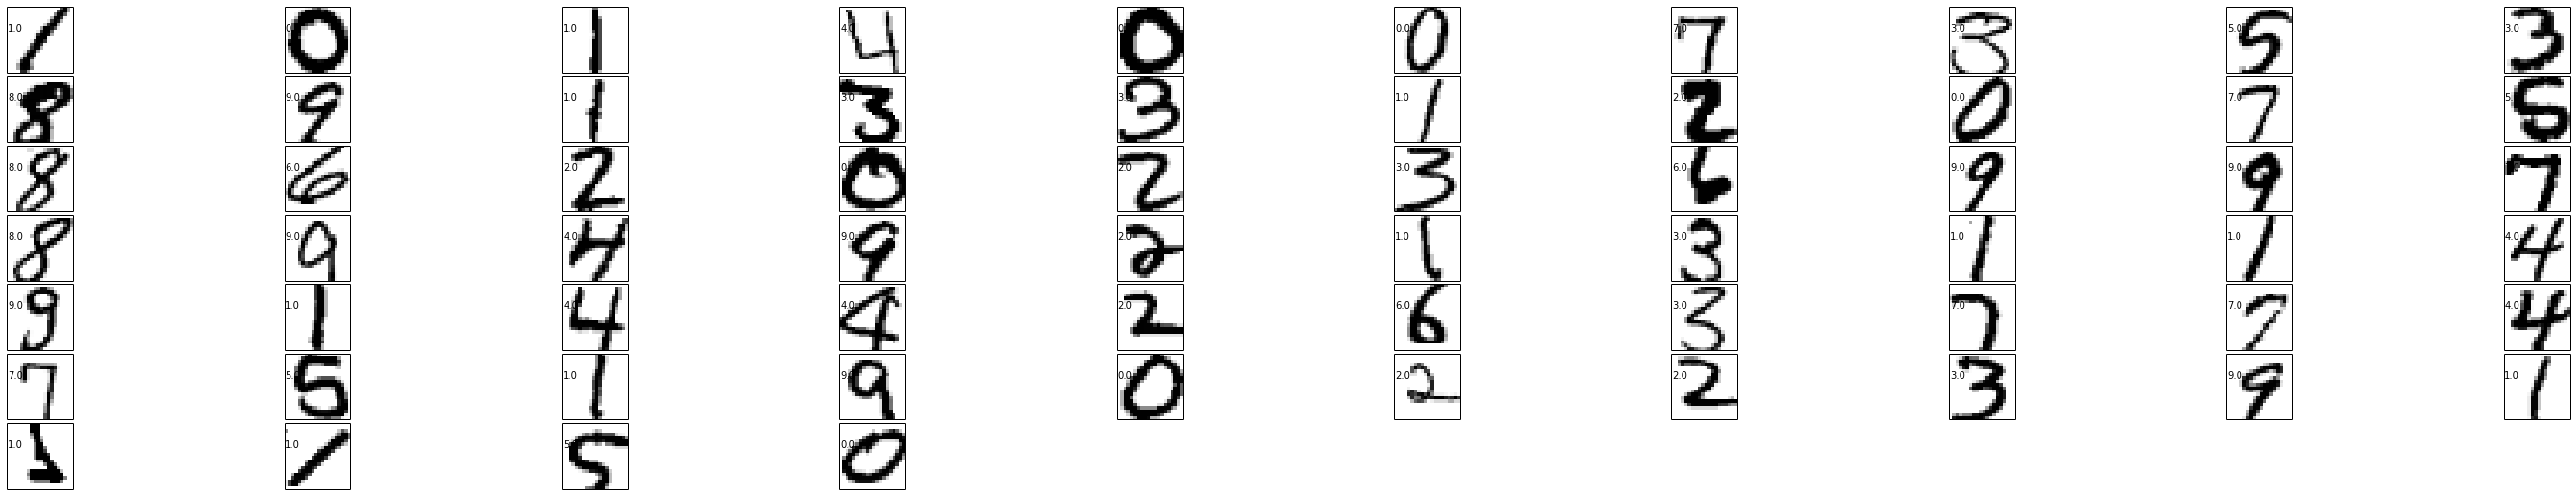

In [87]:
fig = plt.figure(figsize=(40,10))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(img2[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(ys[i]))

In [185]:
xs = img2.reshape(42000,400)
print xs.shape
ys = Y
print ys.shape

(42000, 400)
(42000,)


In [152]:
img2 = xs.reshape(42000,20,20)
img2.shape

(42000, 20, 20)

In [120]:
td = imt2.reshape(28000,400)
td.shape

(28000, 400)

In [186]:
xs.shape

(42000, 400)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


<matplotlib.colorbar.Colorbar instance at 0x7f404df92d88>

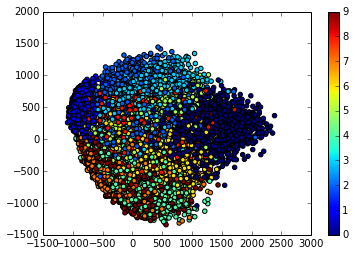

In [187]:
%pylab inline
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
from sklearn.decomposition import RandomizedPCA
pca = RandomizedPCA(n_components=100)
proj = pca.fit_transform(xs)
plt.scatter(proj[:, 0], proj[:, 1], c=ys)
plt.colorbar()

In [188]:
xs = proj
print xs.shape

(42000, 100)


In [189]:
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import train_test_split
# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(xs,ys)

# train the model
clf = GaussianNB()
clf.fit(X_train, y_train)

# use the model to predict the labels of the test data
predicted = clf.predict(X_test)
expected = y_test

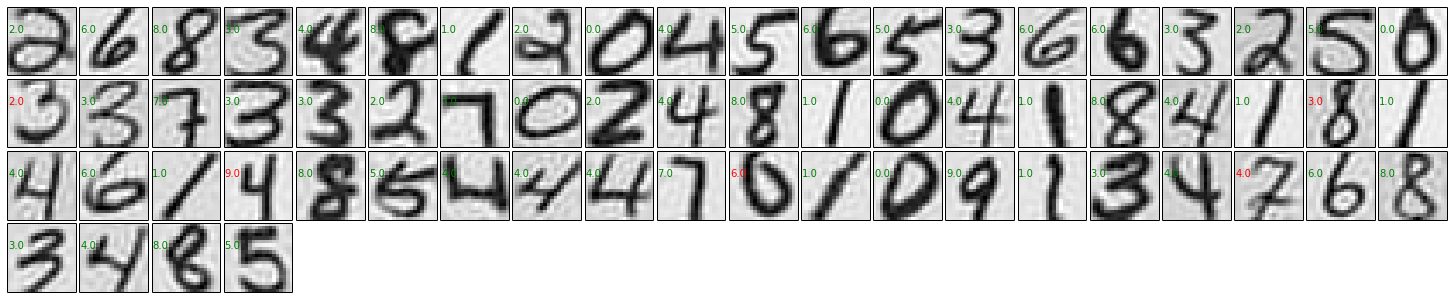

In [201]:
fig = plt.figure(figsize=(20, 20))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.inverse_transform(X_test[i]).reshape(20,20), cmap=plt.cm.binary,
              interpolation='nearest')
    
    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')

In [143]:
Y.shape

(42000,)

In [190]:
matches = (predicted == expected)
print matches.sum()
print len(matches)

9020
10500


In [191]:
td = pca.transform(tes)
td.shape

(28000, 100)

In [192]:
pred = clf.predict(td)
print pred

[ 2.  0.  9. ...,  3.  9.  2.]


In [194]:
f = open('myfile','w')
f.write("ImageId,Label\n")
i = 1;
for k in pred:
    f.write(str(i) + "," + str(int(k)) + "\n")
    i = i+1
f.close()

In [162]:
from sklearn import metrics
print metrics.classification_report(expected, predicted)

             precision    recall  f1-score   support

        0.0       0.95      0.94      0.94      1017
        1.0       0.98      0.93      0.95      1149
        2.0       0.74      0.88      0.80      1061
        3.0       0.84      0.82      0.83      1097
        4.0       0.87      0.80      0.83      1047
        5.0       0.79      0.84      0.81       957
        6.0       0.92      0.89      0.90      1034
        7.0       0.93      0.82      0.87      1051
        8.0       0.84      0.87      0.86       991
        9.0       0.80      0.83      0.81      1096

avg / total       0.87      0.86      0.86     10500



In [171]:
print metrics.confusion_matrix(expected, predicted)

[[ 984    0   14    4    0   21   15    1    2    1]
 [   0 1099   14   11    0   20    7    3   22    2]
 [   6    4  898   27   15   12   21   14   28    6]
 [   5    1   42  917    4   72    3   11   35   21]
 [   0    3   41    1  838   10    7    3    6  111]
 [   7    1   15   58   11  782   20    5   23   12]
 [   8    0   36    1    6   52  917    0    4    0]
 [   5   11   40    7   37   10    5  880   17   45]
 [   3    7   29   31    9   34    7    3  882   16]
 [   5    5   35   11   62   29    3   17   14  901]]
